In [95]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [96]:
dataset = pd.read_excel("dataset.xlsx", skiprows=1)

In [97]:
dataset.columns

Index(['Rank', 'Grant ID', 'Grant Number(s)', 'Title', 'Title translated',
       'Abstract', 'Abstract translated', 'Keywords', 'Funding Amount',
       'Currency', 'Funding Amount in EUR', 'Start Date', 'Start Year',
       'End Date', 'End Year', 'Researchers',
       'Research Organization - original',
       'Research Organization - standardized', 'GRID ID',
       'City of Research organization', 'State of Research organization',
       'Country of Research organization', 'Funder', 'Funder Group',
       'Funder Country', 'Program', 'Resulting publications', 'Source Linkout',
       'Dimensions URL', 'Fields of Research (ANZSRC 2020)', 'RCDC Categories',
       'HRCS HC Categories', 'HRCS RAC Categories', 'Cancer Types',
       'CSO Categories', 'Units of Assessment',
       'Sustainable Development Goals'],
      dtype='object')

# Vedere le città con più collaborazioni, in realtà ci interessa vedere quali sono le città con cui napoli collabora maggiormente

In [98]:
# Filter and split the "City_of_Research_organization" column
city_data = dataset[dataset['City of Research organization'].notnull()].copy()
city_data['City of Research organization'] = city_data['City of Research organization'].str.strip().str.split(';')

# Create a new DataFrame with one row for each city
cities = pd.DataFrame(city_data.explode('City of Research organization')['City of Research organization'])

# Group and count by city
city_counts = cities['City of Research organization'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Sort by count in descending order
city_counts = city_counts.sort_values(by='count', ascending=False).reset_index(drop=True)


In [147]:
lista_valori = []
#count_df = pd.DataFrame()
for e in dataset[dataset["City of Research organization"].notna()]["City of Research organization"].str.split(";"):
    e = [el.strip() for el in e]
    e = list(set(e))
    for s in e:
        s = s.strip()
        lista_valori.append(s)
new_naples_df = pd.DataFrame(lista_valori,columns=["a"])
counts = new_naples_df.value_counts().to_list()
cities = new_naples_df["a"].to_list()
        

In [148]:
from geopy.geocoders import Nominatim

In [149]:
# Initialize a list to store the coordinates of each city
coords_list = []

# Initialize the geolocator
geolocator = Nominatim(user_agent="my_app_name")

# Loop through each city in the dictionary and get its coordinates
for city in cities:
    location = geolocator.geocode(city)
    if location:
        lat = location.latitude
        lon = location.longitude
        coords_list.append((city, lat, lon))

GeocoderServiceError: Non-successful status code 502

In [ ]:
cities = pd.DataFrame(coords_list, columns=["City", "Latitude", "Longitude"])
cities.to_csv("all_cities.csv",index=False)


In [103]:
new_naples_df.value_counts()

a         
Naples        2964
Rome           965
Milan          775
Turin          471
Florence       370
              ... 
Ponferrada       1
Hefei            1
Podgorica        1
Hermosillo       1
Šumperk          1
Length: 1136, dtype: int64

In [104]:
sorted_dic

{'Naples': 2964,
 'Rome': 965,
 'Milan': 775,
 'Turin': 471,
 'Florence': 370,
 'Padova': 323,
 'Bologna': 318,
 'Pisa': 305,
 'Caserta': 280,
 'Bari': 278,
 'Genoa': 252,
 'Catania': 245,
 'Palermo': 242,
 'Fisciano': 228,
 'Paris': 222,
 'Pavia': 181,
 'Perugia': 181,
 'London': 175,
 'Trieste': 175,
 'Siena': 153,
 'Messina': 149,
 'Rende': 140,
 'Munich': 133,
 'Madrid': 126,
 'Cagliari': 122,
 'Parma': 119,
 'Udine': 111,
 'Lecce': 109,
 'Trento': 107,
 'Venice': 106,
 'Modena': 102,
 'Ferrara': 100,
 'Catanzaro': 99,
 'Ancona': 89,
 'L’Aquila': 89,
 'Verona': 86,
 'Cambridge': 82,
 'Brescia': 82,
 'Lisbon': 79,
 'Barcelona': 78,
 'Chieti': 77,
 'Athens': 75,
 'Brussels': 75,
 'Vercelli': 73,
 'Sassari': 71,
 'Stockholm': 66,
 'Amsterdam': 66,
 'Potenza': 65,
 'Cassino': 64,
 'Benevento': 64,
 'Campobasso': 63,
 'Vienna': 55,
 'Hamburg': 55,
 'Berlin': 55,
 'Toulouse': 53,
 'Zurich': 52,
 'Delft': 52,
 'Leuven': 52,
 'Reggio Calabria': 52,
 'Camerino': 48,
 'Oxford': 47,
 'Wagenin

In [105]:
dataset.columns

Index(['Rank', 'Grant ID', 'Grant Number(s)', 'Title', 'Title translated',
       'Abstract', 'Abstract translated', 'Keywords', 'Funding Amount',
       'Currency', 'Funding Amount in EUR', 'Start Date', 'Start Year',
       'End Date', 'End Year', 'Researchers',
       'Research Organization - original',
       'Research Organization - standardized', 'GRID ID',
       'City of Research organization', 'State of Research organization',
       'Country of Research organization', 'Funder', 'Funder Group',
       'Funder Country', 'Program', 'Resulting publications', 'Source Linkout',
       'Dimensions URL', 'Fields of Research (ANZSRC 2020)', 'RCDC Categories',
       'HRCS HC Categories', 'HRCS RAC Categories', 'Cancer Types',
       'CSO Categories', 'Units of Assessment',
       'Sustainable Development Goals'],
      dtype='object')

# Campi di ricerca

In [106]:
dictionary = {}
for e in dataset[dataset["Fields of Research (ANZSRC 2020)"].notna()]["Fields of Research (ANZSRC 2020)"].str.split(";"):

    for s in e:
        if s in dictionary:
            dictionary[s]+=1
        else:
            dictionary[s] = 1
sorted_dic = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1],reverse=True)}

In [107]:
sorted_dic

{'31 Biological Sciences': 545,
 '32 Biomedical and Clinical Sciences': 378,
 '40 Engineering': 289,
 ' 3101 Biochemistry and Cell Biology': 211,
 ' 40 Engineering': 200,
 '34 Chemical Sciences': 190,
 ' 32 Biomedical and Clinical Sciences': 162,
 '30 Agricultural, Veterinary and Food Sciences': 157,
 ' 3105 Genetics': 126,
 '33 Built Environment and Design': 125,
 '37 Earth Sciences': 113,
 '43 History, Heritage and Archaeology': 90,
 '44 Human Society': 88,
 ' 3211 Oncology and Carcinogenesis': 88,
 '35 Commerce, Management, Tourism and Services': 87,
 '46 Information and Computing Sciences': 85,
 ' 3202 Clinical Sciences': 81,
 ' 46 Information and Computing Sciences': 79,
 ' 4303 Historical Studies': 78,
 ' 3403 Macromolecular and Materials Chemistry': 77,
 ' 44 Human Society': 65,
 '51 Physical Sciences': 64,
 ' 3705 Geology': 62,
 ' 4016 Materials Engineering': 60,
 ' 41 Environmental Sciences': 59,
 ' 34 Chemical Sciences': 58,
 ' 4005 Civil Engineering': 57,
 ' 49 Mathematical 

In [108]:
keys = list(sorted_dic.keys())
values = list(sorted_dic.values())


(array([ 0.,  0., 14., 10.,  7., 10.,  9., 10.,  7.,  6.,  3.,  6.,  5.,
         5.,  2.,  9.,  3.,  5.,  2.,  5.,  2.,  7.,  4.,  5.,  3.,  2.,
         2.,  1.,  2.,  1.,  1.,  2.,  3.,  2.,  2.,  4.,  4.,  2.,  1.,
         1.,  1.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  3.,  1.,  0.,  0.,  2.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

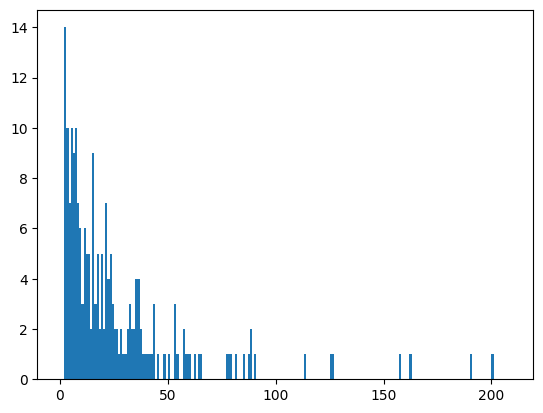

In [109]:
plt.hist(values,range(len(keys)))

# Resulting publications -> valutare progetti a cui napoli ha preso parte con più pubblicazioni o magari con più fondi

In [110]:
a = dataset[dataset["Resulting publications"].notna()]
cnt = []
for riga in a["Resulting publications"]:
    s = riga.split(";")
    cnt.append(len(s))

a["num_pub"] = cnt
a = a.sort_values(by=["num_pub"],ascending=False)
a.head(10)


/var/folders/48/tzp62xjn58bb_nw1n30kx0sh0000gn/T/ipykernel_33054/4013711351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["num_pub"] = cnt


,Rank,Grant ID,Grant Number(s),Title,Title translated,Abstract,Abstract translated,Keywords,Funding Amount,Currency,...,Dimensions URL,Fields of Research (ANZSRC 2020),RCDC Categories,HRCS HC Categories,HRCS RAC Categories,Cancer Types,CSO Categories,Units of Assessment,Sustainable Development Goals,num_pub
229,100,grant.8104228,785907; 220793; HBP SGA2; 10.3030/785907,Human Brain Project Specific Grant Agreement 2,Human Brain Project Specific Grant Agreement 2,The Human Brain Project (HBP) is a major Europ...,The Human Brain Project (HBP) is a major Europ...,NaN,88000000,EUR,...,https://app.dimensions.ai/details/grant/grant....,46 Information and Computing Sciences; 52 Psyc...,Neurosciences,NaN,1.1 Normal biological development and functioning,NaN,NaN,"A04 Psychology, Psychiatry and Neuroscience",NaN,1527
106,100,grant.9244722,945539; 229984; HBP SGA3; 10.3030/945539,Human Brain Project Specific Grant Agreement 3,Human Brain Project Specific Grant Agreement 3,The last of four multi-year work plans will ta...,The last of four multi-year work plans will ta...,NaN,150000000,EUR,...,https://app.dimensions.ai/details/grant/grant....,46 Information and Computing Sciences; 4608 Hu...,Bioengineering; Neurosciences,Generic health relevance; Neurological,NaN,NaN,NaN,B11 Computer Science and Informatics,"9 Industry, Innovation and Infrastructure",1090
1043,100,grant.2763827,G0600717,MRC Centre for Translational Research in Obesi...,MRC Centre for Translational Research in Obesi...,Obesity is a major cause of premature death an...,Obesity is a major cause of premature death an...,NaN,2526403,GBP,...,https://app.dimensions.ai/details/grant/grant....,32 Biomedical and Clinical Sciences; 42 Health...,Diabetes; Nutrition; Obesity; Prevention,Cancer; Cardiovascular; Metabolic and endocrin...,1.5 Resources and infrastructure (underpinning...,Not Site-Specific Cancer,1.5 Resources and Infrastructure; 2.4 Resource...,A01 Clinical Medicine,3 Good Health and Well Being,385
602,100,grant.2751763,ES/K002309/1,Systemic Risk Centre,Systemic Risk Centre,Systemic financial risk and the impact of fina...,Systemic financial risk and the impact of fina...,NaN,3757474,GBP,...,https://app.dimensions.ai/details/grant/grant....,"35 Commerce, Management, Tourism and Services;...",NaN,NaN,NaN,NaN,NaN,C17 Business and Management Studies,NaN,369
1988,100,grant.2777196,MC_U132670600,The role of p53/p73 family members in the cyto...,The role of p53/p73 family members in the cyto...,"Many of the drugs used in cancer therapy, exer...","Many of the drugs used in cancer therapy, exer...",NaN,11336245,GBP,...,https://app.dimensions.ai/details/grant/grant....,31 Biological Sciences; 3101 Biochemistry and ...,Biotechnology; Cancer; Genetics; Stem Cell Res...,Cancer,1.1 Normal biological development and function...,Not Site-Specific Cancer,1.1 Normal Functioning; 1.3 Cancer Initiation:...,A01 Clinical Medicine,NaN,361
563,100,grant.3560018,EP/L010917/1,Innovation and Knowledge Centre for Smart Infr...,Innovation and Knowledge Centre for Smart Infr...,The Centre for Smart Infrastructure and Constr...,The Centre for Smart Infrastructure and Constr...,NaN,2184283,GBP,...,https://app.dimensions.ai/details/grant/grant....,33 Built Environment and Design; 3302 Building...,NaN,Generic health relevance,NaN,NaN,NaN,"C13 Architecture, Built Environment and Planning",NaN,353
606,100,grant.2766251,EP/K000314/1,Innovation and Knowledge Centre for Smart Infr...,Innovation and Knowledge Centre for Smart Infr...,Infrastructure represents a large part of the ...,Infrastructure represents a large part of the ...,NaN,2311584,GBP,...,https://app.dimensions.ai/details/grant/grant....,33 Built Environment and Design; 3301 Architec...,NaN,Generic health relevance,NaN,NaN,NaN,"C13 Architecture, Built Environment and Planning",12 Responsible Consumption and Production; 8 D...,345
666,100,grant.2775685,EP/I019308/1,Innovation Knowledge Centre for Smart Infrastr...,Innovation Knowledge Centre for Sma

In [111]:
b = a.sort_values(by=["Funding Amount"],ascending=False)
b.head(10)

,Rank,Grant ID,Grant Number(s),Title,Title translated,Abstract,Abstract translated,Keywords,Funding Amount,Currency,...,Dimensions URL,Fields of Research (ANZSRC 2020),RCDC Categories,HRCS HC Categories,HRCS RAC Categories,Cancer Types,CSO Categories,Units of Assessment,Sustainable Development Goals,num_pub
39,100,grant.12961001,101057014; 241751; PARC; 10.3030/101057014,Partnership for the Assessment of Risks from C...,Partnership for the Assessment of Risks from C...,PARC is an EU-wide research and innovation par...,PARC is an EU-wide research and innovation par...,NaN,200000000,EUR,...,https://app.dimensions.ai/details/grant/grant....,"35 Commerce, Management, Tourism and Services;...",NaN,NaN,NaN,NaN,NaN,C14 Geography and Environmental Studies,11 Sustainable Cities and Communities,32
569,100,grant.7676812,807083; 216645; GAM AIR 2018; 10.3030/807083,AIRFRAME ITD,AIRFRAME ITD,The Airframe ITD aims at re-thinking and devel...,The Airframe ITD aims at re-thinking and devel...,NaN,160974880,EUR,...,https://app.dimensions.ai/details/grant/grant....,40 Engineering; 4001 Aerospace Engineering,NaN,NaN,NaN,NaN,NaN,B12 Engineering,NaN,48
106,100,grant.9244722,945539; 229984; HBP SGA3; 10.3030/945539,Human Brain Project Specific Grant Agreement 3,Human Brain Project Specific Grant Agreement 3,The last of four multi-year work plans will ta...,The last of four multi-year work plans will ta...,NaN,150000000,EUR,...,https://app.dimensions.ai/details/grant/grant....,46 Information and Computing Sciences; 4608 Hu...,Bioengineering; Neurosciences,Generic health relevance; Neurological,NaN,NaN,NaN,B11 Computer Science and Informatics,"9 Industry, Innovation and Infrastructure",1090
229,100,grant.8104228,785907; 220793; HBP SGA2; 10.3030/785907,Human Brain Project Specific Grant Agreement 2,Human Brain Project Specific Grant Agreement 2,The Human Brain Project (HBP) is a major Europ...,The Human Brain Project (HBP) is a major Europ...,NaN,88000000,EUR,...,https://app.dimensions.ai/details/grant/grant....,46 Information and Computing Sciences; 52 Psyc...,Neurosciences,NaN,1.1 Normal biological development and functioning,NaN,NaN,"A04 Psychology, Psychiatry and Neuroscience",NaN,1527
567,100,grant.7834124,807090; 218796; FRC GAM 2018; 10.3030/807090,Fast Rotorcraft,Fast Rotorcraft,The challenge in rotorcraft design is always t...,The challenge in rotorcraft design is always t...,NaN,85997328,EUR,...,https://app.dimensions.ai/details/grant/grant....,40 Engineering; 4010 Engineering Practice and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
131,100,grant.9414031,945521; 231024; GAM-2020-AIR; 10.3030/945521,AIRFRAME ITD,AIRFRAME ITD,The Airframe ITD aims at re-thinking and devel...,The Airframe ITD aims at re-thinking and devel...,NaN,75307408,EUR,...,https://app.dimensions.ai/details/grant/grant....,40 Engineering; 4001 Aerospace Engineering,NaN,NaN,NaN,NaN,NaN,B12 Engineering,NaN,49
568,100,grant.7676805,807089; 216635; REG GAM 2018; 10.3030/807089,Regional Aircraft,Regional Aircraft,An aircraft that can transport between approxi...,An aircraft that can transport between approxi...,NaN,50224604,EUR,...,https://app.dimensions.ai/details/grant/grant....,40 Engineering; 4001 Aerospace Engineering,NaN,NaN,NaN,NaN,NaN,B12 Engineering,NaN,26
270,100,grant.6503807,733032; 207219; HBM4EU; 10.3030/733032,European Human Biomonitoring Initiative,European Human Biomonitoring Initiative,The overarching goal of the European Human Bio...,The overarching goal of the European Human Bio...,NaN,49933776,EUR,...,https://app.dimensions.ai/details/grant/grant....,41 Environmental Sciences; 42 Health Sciences;...,NaN,Generic health relevance,2.2 Factors relating to the physical environme...,NaN,NaN,"A02 Public Health, Health Services and Primary...",NaN,238
133,100,grant.9065967,945542; 229352; GAM-2020-FRC; 10.3030/945542,Fast Rotorcraft,Fast Rotorcraft,The challenge in rotorcraft design is always t...,The challenge in rotorcraft design is always t...,NaN,48242712,EUR,...,https:

# Cancer country distribution

In [112]:
a = dataset[~dataset["Cancer Types"].isna()]
a.groupby(["Funder Country"]).count()

,Rank,Grant ID,Grant Number(s),Title,Title translated,Abstract,Abstract translated,Keywords,Funding Amount,Currency,...,Source Linkout,Dimensions URL,Fields of Research (ANZSRC 2020),RCDC Categories,HRCS HC Categories,HRCS RAC Categories,Cancer Types,CSO Categories,Units of Assessment,Sustainable Development Goals
Funder Country,,,,,,,,,,,,,,,,,,,,,
Belgium,39,39,39,39,39,39,39,0,39,39,...,39,39,39,38,36,31,39,35,39,5
Italy,201,201,201,201,201,201,201,0,201,172,...,34,201,201,54,115,115,201,161,55,2
Qatar,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,0,1,1,1,0
United Kingdom,13,13,13,13,13,13,13,0,13,13,...,12,13,13,13,13,13,13,13,13,5
United States,2,2,2,2,2,2,2,0,2,1,...,1,2,2,2,2,2,2,2,2,0


# Funding by country

In [113]:
a = dataset[~dataset["Funding Amount"].isna()]
a.groupby(["Funder Country"]).sum()

,Rank,Funding Amount,Funding Amount in EUR,Start Year,End Year
Funder Country,,,,,
Australia,100,388648,2.537940e+05,2016.0,2019.0
Belgium,65000,2888991882,2.888992e+09,1287764.0,1287813.0
Chile,100,0,0.000000e+00,2019.0,0.0
Germany,1200,0,0.000000e+00,24185.0,18164.0
Italy,214400,507406795,5.074068e+08,4301027.0,4303658.0
Japan,100,4810000,3.698200e+04,2014.0,2017.0
Portugal,200,101456,1.014560e+05,4038.0,4044.0
Qatar,100,0,0.000000e+00,2014.0,2018.0
Switzerland,500,2388849,2.184410e+06,10073.0,10090.0


In [114]:
a = dataset[~dataset["Cancer Types"].isna()]
print(a.shape)


print(a["CSO Categories"].unique())
print(len(a["Sustainable Development Goals"].notna()))

(256, 37)
['2.1 Exogenous Factors in the Origin and Cause of Cancer'
 '1.1 Normal Functioning'
 '5.3 Systemic Therapies - Discovery and Development'
 '5.4 Systemic Therapies - Clinical Applications'
 '1.2 Cancer Initiation: Alterations in Chromosomes; 1.3 Cancer Initiation: Oncogenes and Tumor Suppressor Genes'
 '1.4 Cancer Progression and Metastasis; 5.3 Systemic Therapies - Discovery and Development'
 '1.3 Cancer Initiation: Oncogenes and Tumor Suppressor Genes; 1.4 Cancer Progression and Metastasis'
 '1.2 Cancer Initiation: Alterations in Chromosomes; 5.3 Systemic Therapies - Discovery and Development'
 '1.5 Resources and Infrastructure; 4.1 Technology Development and/or Marker Discovery'
 '4.1 Technology Development and/or Marker Discovery; 4.2 Technology and/or Marker Evaluation With Respect to Fundamental Parameters of Method'
 '1.4 Cancer Progression and Metastasis; 4.1 Technology Development and/or Marker Discovery; 5.3 Systemic Therapies - Discovery and Development'
 '4.1 Tech

In [115]:
vals = dataset["Title"].value_counts()

In [116]:
len(dataset[dataset['Abstract translated'].duplicated()])

230

In [117]:
dataset["Grant Number(s)"].head()

0    101060072; 243634; ACTNOW; 10.3030/101060072
1    101060218; 243603; DOMINO; 10.3030/101060218
2     101072488; 239629; TRAIL; 10.3030/101072488
3     101073271; 239656; SHINE; 10.3030/101073271
4      101102007; 243681; HERA; 10.3030/101102007
Name: Grant Number(s), dtype: object

In [118]:
dataset["Grant ID"].head()

0    grant.13242069
1    grant.13046237
2    grant.12941744
3    grant.12941771
4    grant.13242078
Name: Grant ID, dtype: object

In [119]:
dataset["Title"].head(5)

0    Advancing understanding of Cumulative Impacts ...
1    Harnessing the microbial potential of fermente...
2                     TRAnsparent InterpretabLe robots
3    Safe underground Hydrogen storage IN porous su...
4                Hybrid-Electric Regional Architecture
Name: Title, dtype: object

In [120]:
len(dataset["Cancer Types"].value_counts())

45

In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rank                                  2964 non-null   int64  
 1   Grant ID                              2964 non-null   object 
 2   Grant Number(s)                       2885 non-null   object 
 3   Title                                 2964 non-null   object 
 4   Title translated                      2964 non-null   object 
 5   Abstract                              2805 non-null   object 
 6   Abstract translated                   2805 non-null   object 
 7   Keywords                              86 non-null     object 
 8   Funding Amount                        2964 non-null   int64  
 9   Currency                              2836 non-null   object 
 10  Funding Amount in EUR                 2674 non-null   float64
 11  Start Date       

In [122]:
dataset["Keywords"].value_counts()

Biology; Research                                                                                                                                                                                                     12
Medical Sciences; Research                                                                                                                                                                                             9
Engineering; Research                                                                                                                                                                                                  6
Chemistry; Research                                                                                                                                                                                                    3
History; Research                                                                                                                   

In [123]:
dataset.describe()

,Rank,Funding Amount,Funding Amount in EUR,Start Year,End Year
count,2964.0,2.964000e+03,2.674000e+03,2956.000000,2949.000000
mean,100.0,1.182244e+06,1.321146e+06,2005.950947,2008.338759
std,0.0,6.901760e+06,7.266733e+06,7.791311,8.158342
min,100.0,0.000000e+00,2.854000e+03,1965.000000,1966.000000
25%,100.0,8.700000e+04,1.101258e+05,2001.000000,2003.000000
50%,100.0,1.750000e+05,2.007605e+05,2005.000000,2007.000000
75%,100.0,4.672408e+05,5.525712e+05,2010.000000,2013.000000
max,100.0,2.000000e+08,2.000000e+08,2023.000000,2029.000000


array([[<AxesSubplot: title={'center': 'Rank'}>,
        <AxesSubplot: title={'center': 'Funding Amount'}>],
       [<AxesSubplot: title={'center': 'Funding Amount in EUR'}>,
        <AxesSubplot: title={'center': 'Start Year'}>],
       [<AxesSubplot: title={'center': 'End Year'}>, <AxesSubplot: >]],
      dtype=object)

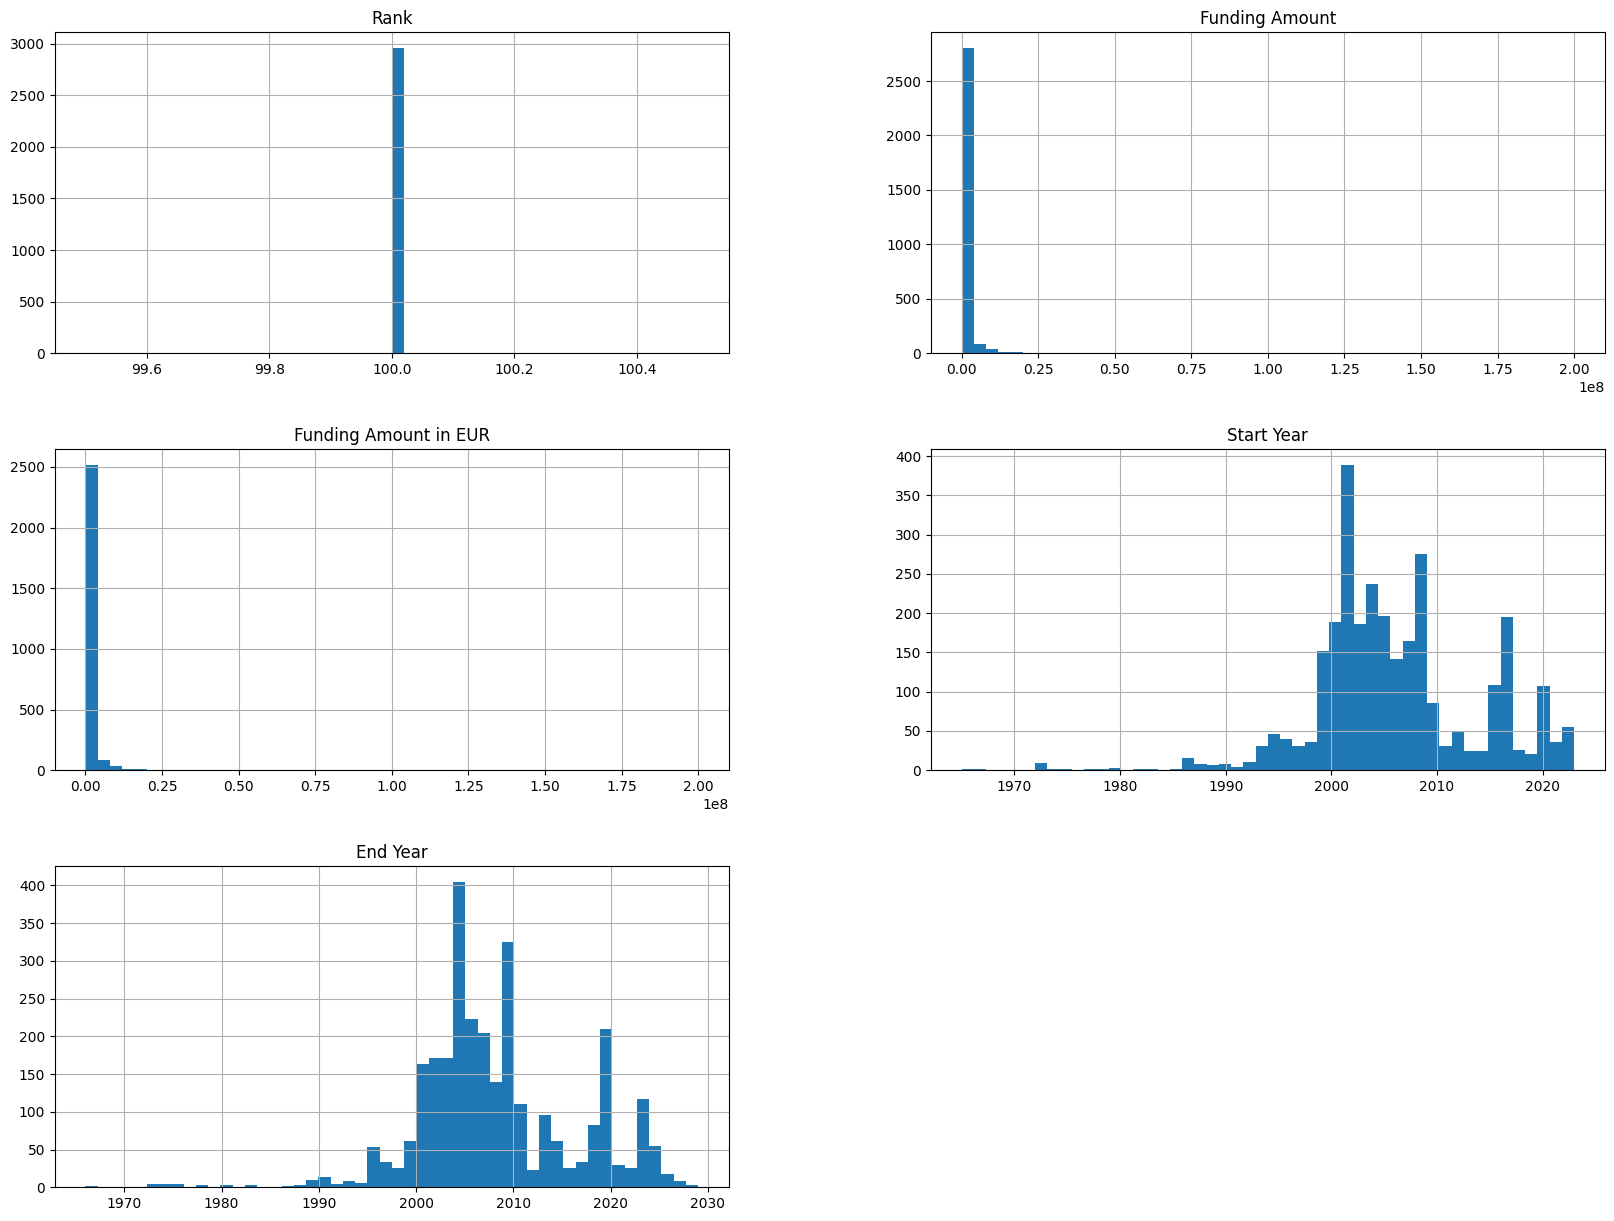

In [124]:
dataset.hist(bins=50, figsize=(20,15)) 

/Users/raffaelerusso/opt/anaconda3/envs/bi_ia/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Start Year', ylabel='End Year'>

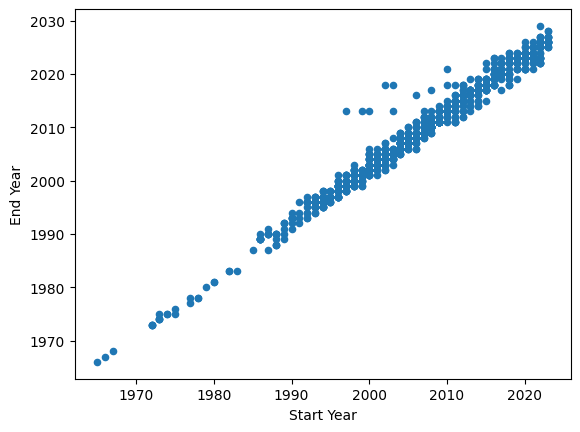

In [125]:
dataset.plot(kind="scatter", x="Start Year", y="End Year")

In [126]:
dataset.corr()

,Rank,Funding Amount,Funding Amount in EUR,Start Year,End Year
Rank,NaN,NaN,NaN,NaN,NaN
Funding Amount,NaN,1.000000,0.999530,0.149056,0.175655
Funding Amount in EUR,NaN,0.999530,1.000000,0.165168,0.196828
Start Year,NaN,0.149056,0.165168,1.000000,0.992526
End Year,NaN,0.175655,0.196828,0.992526,1.000000


## Graph

In [127]:
import networkx as nx

In [128]:
dictionary = {}  
cnt=0  
for e in dataset[dataset["City of Research organization"].notna()]["City of Research organization"].str.split(";").apply(lambda x: [y.strip() for y in x]): 
    p=list(set(e))  
    if(cnt==2958 or cnt==30):  
        print(p)  
        cnt+=1  
    for s in p:  
            if s in dictionary: 
                dictionary[s]+=1  
            else:  
                dictionary[s] = 1  
sorted_dic = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1],reverse=True)}  
print(sorted_dic.keys())

dict_keys(['Naples', 'Rome', 'Milan', 'Turin', 'Florence', 'Padova', 'Bologna', 'Pisa', 'Caserta', 'Bari', 'Genoa', 'Catania', 'Palermo', 'Fisciano', 'Paris', 'Pavia', 'Perugia', 'London', 'Trieste', 'Siena', 'Messina', 'Rende', 'Munich', 'Madrid', 'Cagliari', 'Parma', 'Udine', 'Lecce', 'Trento', 'Venice', 'Modena', 'Ferrara', 'Catanzaro', 'Ancona', 'L’Aquila', 'Verona', 'Cambridge', 'Brescia', 'Lisbon', 'Barcelona', 'Chieti', 'Athens', 'Brussels', 'Vercelli', 'Sassari', 'Stockholm', 'Amsterdam', 'Potenza', 'Cassino', 'Benevento', 'Campobasso', 'Vienna', 'Hamburg', 'Berlin', 'Toulouse', 'Zurich', 'Delft', 'Leuven', 'Reggio Calabria', 'Camerino', 'Oxford', 'Wageningen', 'Viterbo', 'Foggia', 'Copenhagen', 'Oslo', 'Cologne', 'Warsaw', 'Bristol', 'Gothenburg', 'Kongens Lyngby', 'Dublin', 'Edinburgh', 'Utrecht', 'Prague', 'Urbino', 'Ljubljana', 'Ghent', 'Valencia', 'Varese', 'Lausanne', 'Sheffield', 'Karlsruhe', 'Heidelberg', 'Nottingham', 'Moscow', 'Pátrai', 'Budapest', 'Helsinki', 'Manche

In [129]:
# Create a set of all unique cities in the "City of Research organization" column of dataset
cities = set()
for city_list in dataset["City of Research organization"].dropna():
    for city in city_list.split(";"):
        cities.add(city.strip())

# Create a dictionary with the same keys as the input dictionary, and initialize their values to empty sets
new_dict = {key : set() for key in dictionary.keys()}

# Loop over the keys of the input dictionary
for key in dictionary.keys():
    # Loop over the values in the "City of Research organization" column of dataset that contain the current key
    for city_list in dataset[dataset["City of Research organization"].str.contains(key, na=False)]["City of Research organization"]:
        # Split the list of cities, strip each city, and convert to a set
        city_set = set(city.strip() for city in city_list.split(";"))
        # Add all cities in the set to the value associated with the current key in new_dict,
        # except for the current key itself
        new_dict[key].update(city for city in city_set if city != key)

# Convert the values in new_dict from sets to lists
new_dict = {key : list(value) for key, value in new_dict.items()}


/var/folders/48/tzp62xjn58bb_nw1n30kx0sh0000gn/T/ipykernel_33054/2160789141.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  for city_list in dataset[dataset["City of Research organization"].str.contains(key, na=False)]["City of Research organization"]:


In [130]:
# Create an empty graph
graph = nx.Graph()

# Add nodes for all the cities in the dictionary
graph.add_nodes_from(new_dict.keys())

# Add edges between cities based on the connections in the dictionary
for city, connected_cities in new_dict.items():
    for connected_city in connected_cities:
        graph.add_edge(city, connected_city)


## Save

In [131]:
def replace_char(s, old_char, new_char):
    if isinstance(s, str):
        return s.replace(old_char, new_char)
    else:
        return s

# Apply the function to all string elements in the dataframe
dataset = dataset.applymap(lambda x: replace_char(x, '|', '-'))
dataset = dataset.applymap(lambda x: replace_char(x, '\n', ' '))
#dataset = dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [132]:
dataset.to_csv("dataset_header.csv",sep= '|',index=False,header=True, encoding='utf-8')

In [133]:
df_new = dataset.iloc[:, :6]
df_new = df_new.applymap(lambda x: replace_char(x, '\n', ' '))
df_new.to_csv("dataset.csv",sep= '|',index=False,header=False, encoding='utf-8')

In [ ]:
lista_valori = []
#count_df = pd.DataFrame()
for e in dataset[dataset["City of Research organization"].notna()]["City of Research organization"].str.split(";"):
    e = [el.strip() for el in e]
    e = list(set(e))
    for s in e:
        s = s.strip()
        lista_valori.append(s)
new_naples_df = pd.DataFrame(lista_valori,columns=["a"])
new_naples_df.value_counts()
        

In [51]:
dataset = pd.read_csv("dataset.csv",sep='|')

In [56]:
dataset.columns

Index(['100', 'grant.13242069', '101060072; 243634; ACTNOW; 10.3030/101060072',
       'Advancing understanding of Cumulative Impacts on European marine biodiversity, ecosystem functions and services for human wellbeing',
       'Advancing understanding of Cumulative Impacts on European marine biodiversity, ecosystem functions and services for human wellbeing.1',
       'ACTNOW advances the state-of-the-art in understanding and forecasting of the cumulative impacts of climate change and interacting drivers on marine systems. The program provides solutions options to halt the loss of biodiversity, to restore and protect habitats and ecosystem processes, and to safeguard the contributions of marine areas to human well-being.  ACTNOW is co-developed with EU policy stakeholders to deliver: 1) Mechanistic (cause-and-effect) understanding of the impacts of multiple interacting drivers on organisms, communities, habitats and ecosystems from individual-level performance to ecosystem-level stab

In [55]:
for index in range(dataset.shape[0]):
    e = dataset.loc[index,"City of Research organization"]
   # e = [el.strip() for el in e]
   # e = list(set(e))
   # row["City of Research organization"] = e

KeyError: 'City of Research organization'

In [50]:
lista_valori = []
#count_df = pd.DataFrame()
for e in dataset[dataset["City of Research organization"].notna()]["City of Research organization"].str.split(";"):
    e = [el.strip() for el in e]
    e = list(set(e))
    for s in e:
        s = s.strip()
        lista_valori.append(s)
new_naples_df = pd.DataFrame(lista_valori,columns=["a"])
new_naples_df.value_counts()

a         
Naples        2964
Rome           965
Milan          775
Turin          471
Florence       370
              ... 
Ponferrada       1
Hefei            1
Podgorica        1
Hermosillo       1
Šumperk          1
Length: 1136, dtype: int64